# Outflow of telecommunication company users

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

import multiprocessing
import warnings
warnings.filterwarnings('ignore')

# 1. Описание данных

### 1.1 Загрузка данных

In [127]:
df = pd.read_csv('telecom_users.csv').iloc[:,1:]
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


### 1.2 Размерность датасета

In [128]:
df.shape

(5986, 21)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


### 1.3 Кол-во пропущенных значений в каждом из признаков

In [130]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1.4 Пустые строки

In [131]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Необходима будет замена на какие-то значения. Скорее всего - на 0

### 1.5 Кол-во ушедших пользователей к оставшимся

In [132]:
df.groupby('Churn')['customerID'].count().reset_index()

,Churn,customerID
0,No,4399
1,Yes,1587


Классы сильно неравномерны.

### 1.6 Показатели дискретных данных

In [133]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


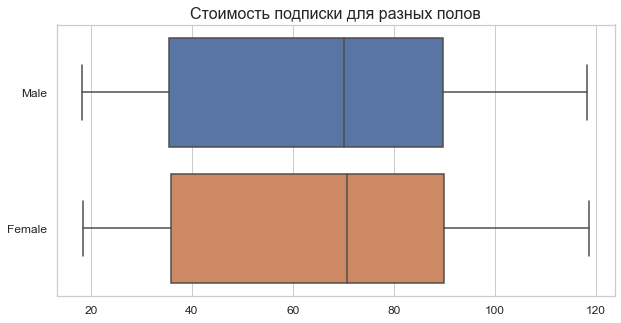

In [134]:
plt.figure(figsize=(10,5))
plt.title("Стоимость подписки для разных полов", fontsize=16)
plt.tick_params(labelsize=12)

sns.boxplot(x='MonthlyCharges', y="gender", data=df).set(ylabel=None, xlabel=None)
plt.show()

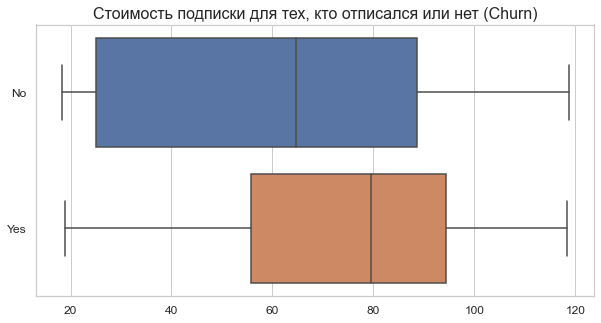

In [135]:
plt.figure(figsize=(10,5))
plt.title("Стоимость подписки для тех, кто отписался или нет (Churn)", fontsize=16)
plt.tick_params(labelsize=12)

sns.boxplot(x='MonthlyCharges', y="Churn", data=df).set(ylabel=None, xlabel=None)
plt.show()

### 1.7 Показатели категориальных данных

In [136]:
df.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


### 1.8 Кол-во пользователей пенсионного возраста

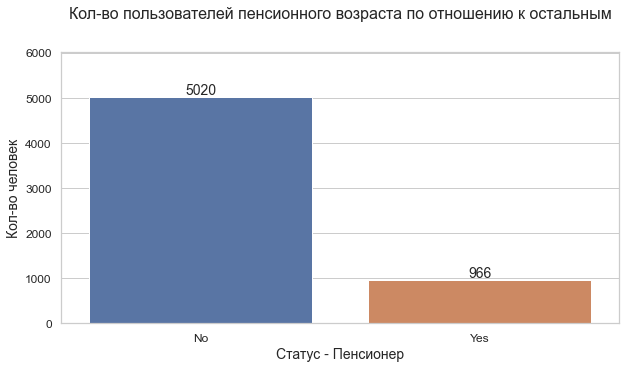

In [137]:
df_g_tmp = df.groupby('SeniorCitizen')['customerID'].count().reset_index()
df_g_tmp['SeniorCitizen'].replace([0, 1], ['No', 'Yes'], inplace=True)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_g_tmp, x='SeniorCitizen', y='customerID', ax=ax)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_ylim(0, df_g_tmp['customerID'].max()*1.2)
ax.set_title('Кол-во пользователей пенсионного возраста по отношению к остальным', fontsize=16, y=1.1)
ax.set_xlabel('Статус - Пенсионер', fontsize=14)
ax.set_ylabel('Кол-во человек', fontsize=14)
ax.bar_label(ax.containers[0], fontsize=14)

plt.show()

### 1.9 Процент пользователей, использующих телефонную связь

In [138]:
df[df['PhoneService'] == 'Yes']['customerID'].count() / df['customerID'].count()

0.9014366855997327

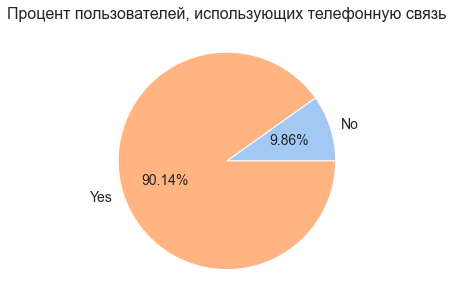

In [139]:
df_g_tmp = df.groupby('PhoneService')['customerID'].count()
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp, labels = df_g_tmp.index, colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Процент пользователей, использующих телефонную связь', fontsize=16)
plt.show()

### 1.10 Процент пользователей, использующих интернет, в целом

In [140]:
df[df['InternetService'] != 'No']['customerID'].count() / df['customerID'].count()

0.7843301035750083

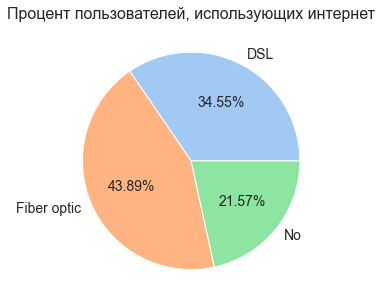

In [141]:
df_g_tmp = df.groupby('InternetService')['customerID'].count()
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp, labels = df_g_tmp.index, colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Процент пользователей, использующих интернет', fontsize=16)
plt.show()

## 1.11 Первые очевидные выводы, описание данных:

- В данных практически отсуствуют пропуски, что радует (в TotalCharges пропуски будут заменены на 0);
- Большинство данных представляют собой ответы из 2 или 3х вариантов;
- Почти все категориальные признаки будут переведены в числовые значения (0, 1, 2..). Суть признаков позваляет это сделать;
- Желательно получить доп. данные по стоимости подписки за последни 1-2 месяца;
- Странно, что часть данных заведена в виде значений 0/1, а другая часть Yes/No;
- Признак 'MultipleLines' сильно зависит от значения признака 'PhoneService' и даже нивелирует его;
- Признаки ['OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'] сильно зависят от значения признака 'InternetService';
- Признак 'TotalCharges' почему-то типа object;
- Стоимость подписки ушедших людей ощутимо выше;
- У 90% пользователей была подключена телефонная связь, и только у 78% был подключен интернет;
- Женщин и мужчин ~одинаковое кол-во;
- Состоящих в браке или нет ~одинаковое кол-во.
- Классы сильно неравномерны, поэтому метрика accuracy_score не подойдёт.

# 2. Исследование зависимостей и формулирование гипотез

### 2.1 замена пустых строк в общей сумме за услуги

In [142]:
df['TotalCharges'].replace(' ', 0, inplace=True)

### 2.2 Отток пользователей в зав-ти от статуса "SeniorCitizen"

In [143]:
df_sc = df[['SeniorCitizen', 'Churn', 'customerID']].groupby(['SeniorCitizen', 'Churn']).count().reset_index()
df_sc['SeniorCitizen'].replace([0, 1], ['No', 'Yes'], inplace=True)
sc_count = df_sc.groupby('SeniorCitizen')['customerID'].sum()
df_sc['%OfSC'] = round(df_sc.apply(lambda x: x['customerID']/sc_count[x['SeniorCitizen']], axis=1), 2)
df_sc

,SeniorCitizen,Churn,customerID,%OfSC
0,No,No,3835,0.76
1,No,Yes,1185,0.24
2,Yes,No,564,0.58
3,Yes,Yes,402,0.42


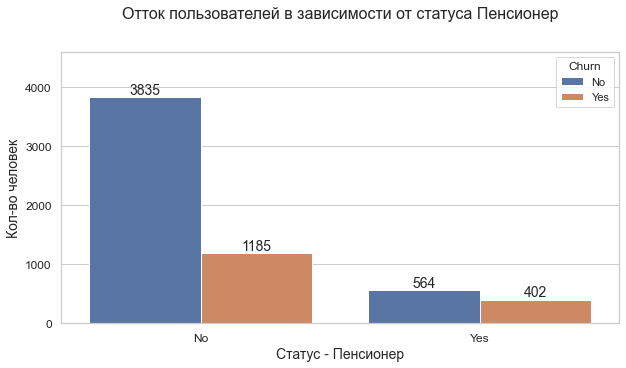

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_sc, x='SeniorCitizen', y='customerID', hue='Churn', ax=ax)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_ylim(0, df_sc['customerID'].max()*1.2)
ax.set_title('Отток пользователей в зависимости от статуса Пенсионер', fontsize=16, y=1.1)
ax.set_xlabel('Статус - Пенсионер', fontsize=14)
ax.set_ylabel('Кол-во человек', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

plt.show()

- Из числа тех, кто является пенсионером, ушли целых 42% пользователей
- Из числа тех, кто не является пенсионером, ушли 24% пользователей

### 2.3 Отток в зависимости от провайдера

In [145]:
df_is = df[['InternetService', 'Churn', 'customerID']].groupby(['InternetService', 'Churn']).count().reset_index()
df_is['%OfTotal'] = round(df_is['customerID'] / df['customerID'].count(), 2)
df_is

,InternetService,Churn,customerID,%OfTotal
0,DSL,No,1671,0.28
1,DSL,Yes,397,0.07
2,Fiber optic,No,1536,0.26
3,Fiber optic,Yes,1091,0.18
4,No,No,1192,0.20
5,No,Yes,99,0.02


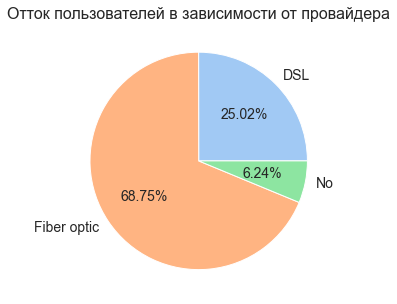

In [146]:
df_g_tmp = df_is[df_is['Churn'] == 'Yes'][['InternetService', 'customerID']]
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp['customerID'], labels = df_g_tmp['InternetService'], 
       colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Отток пользователей в зависимости от провайдера', fontsize=16)
plt.show()

- Очень большое кол-во пользователей ушло от провайдера Fiber optic, явно стоит поискать причины

### 2.4 Оценка оттока в целом от наличия интернета

In [147]:
df_is2 = df[['InternetService', 'Churn', 'customerID']]
df_is2['InternetService'].replace(['Fiber optic', 'DSL'], 'Yes', inplace=True)

df_is2 = df_is2.groupby(['InternetService', 'Churn']).count().reset_index()
is2_count = df_is2.groupby('InternetService')['customerID'].sum()
df_is2['%OfIS'] = round(df_is2.apply(lambda x: x['customerID']/is2_count[x['InternetService']], axis=1), 2)
df_is2

,InternetService,Churn,customerID,%OfIS
0,No,No,1192,0.92
1,No,Yes,99,0.08
2,Yes,No,3207,0.68
3,Yes,Yes,1488,0.32


- Из числа тех, у кого нет интернета, ушли всего 8% пользователей
- Из числа тех, у кого был интернет, ушли целых 32% пользователей

### 2.5 Отток в зависимости от типа контракта

In [148]:
df_co = df[['Contract', 'Churn', 'customerID']].groupby(['Contract', 'Churn']).count().reset_index()
co_count = df_co.groupby('Contract')['customerID'].sum()
df_co['%OfCO'] = round(df_co.apply(lambda x: x['customerID']/co_count[x['Contract']], axis=1), 2)
df_co

,Contract,Churn,customerID,%OfCO
0,Month-to-month,No,1871,0.57
1,Month-to-month,Yes,1398,0.43
2,One year,No,1128,0.88
3,One year,Yes,148,0.12
4,Two year,No,1400,0.97
5,Two year,Yes,41,0.03


- Из числа тех, кто был на конктракте "month-to-month", ушли целых 43% пользователей
- Из числа тех, кто был на конктракте "One year", "Two year", ушли всего 12% и 3% пользователей (соотв.)

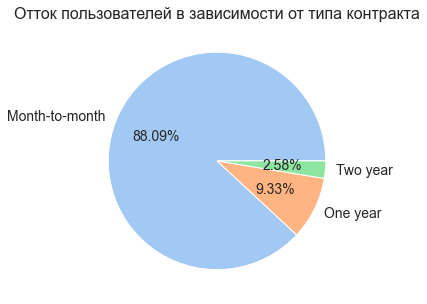

In [149]:
df_g_tmp = df_co[df_co['Churn'] == 'Yes'][['Contract', 'customerID']]
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp['customerID'], labels = df_g_tmp['Contract'], 
       colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Отток пользователей в зависимости от типа контракта', fontsize=16)
plt.show()

Пользователи с контрактом "month-to-month" составляют порядка 88% от общего числа ушедших пользователей.

### 2.6 Отток в зависимости от метода оплаты

In [150]:
df_pm = df[['PaymentMethod', 'Churn', 'customerID']].groupby(['PaymentMethod', 'Churn']).count().reset_index()
pm_count = df_pm.groupby('PaymentMethod')['customerID'].sum()
df_pm['%OfPM'] = round(df_pm.apply(lambda x: x['customerID']/pm_count[x['PaymentMethod']], axis=1), 2)
df_pm

,PaymentMethod,Churn,customerID,%OfPM
0,Bank transfer (automatic),No,1084,0.83
1,Bank transfer (automatic),Yes,224,0.17
2,Credit card (automatic),No,1105,0.85
3,Credit card (automatic),Yes,198,0.15
4,Electronic check,No,1104,0.55
5,Electronic check,Yes,902,0.45
6,Mailed check,No,1106,0.81
7,Mailed check,Yes,263,0.19


- Из числа тех, кто использовал метод оплаты "Electronic check", ушли целых 45% пользователей
- По остальным типам оплаты в целом ситуация ровная (15-19%)

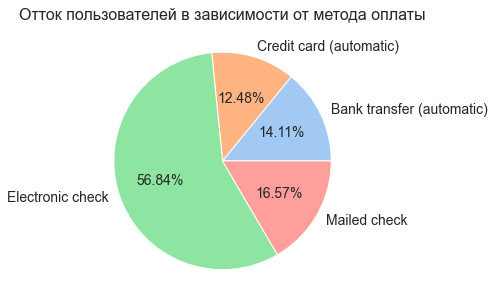

In [151]:
df_g_tmp = df_pm[df_pm['Churn'] == 'Yes'][['PaymentMethod', 'customerID']]
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp['customerID'], labels = df_g_tmp['PaymentMethod'], 
       colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Отток пользователей в зависимости от метода оплаты', fontsize=16)
plt.show()

- Из всех ушедших пользователей целых 57% - те, кто использовал метод оплаты "Electronic check";
- По остальным значения намного меньше

### 2.7 Преобразование данных - кодирование категориальных признаков

In [152]:
df1 = df.copy()

In [153]:
df1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [154]:
df1[['gender', 'Partner', 'Dependents', 'PhoneService', 
     'MultipleLines', 'Churn', 'InternetService', 'OnlineSecurity', 
     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']] = \
df1[['gender', 'Partner', 'Dependents', 'PhoneService', 
     'MultipleLines', 'Churn', 'InternetService', 'OnlineSecurity', 
     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']].astype('category').apply(lambda x: x.cat.codes)

In [155]:
df1.dtypes

customerID           object
gender                 int8
SeniorCitizen         int64
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges         object
Churn                  int8
dtype: object

In [156]:
# Проверка смены типа данных
df1['InternetService'].unique()

array([2, 1, 0], dtype=int8)

In [157]:
df1['TotalCharges'] = df1['TotalCharges'].astype('float64')
df1['TotalCharges'].dtypes

dtype('float64')

### 2.8 Оценка корреляции между признаками

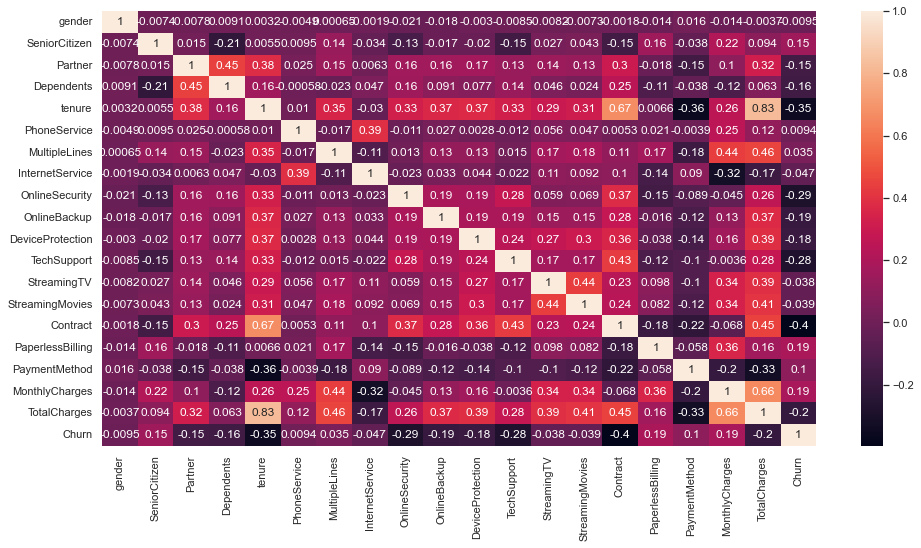

In [158]:
df1_corr = df1.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(df1_corr, annot = True)
plt.show()

In [159]:
# Оценка корреляции от наличия интернета в целом
df1_tmp = df[['InternetService', 'Churn']]
df1_tmp['Churn'].replace(['No', 'Yes'], [0, 1], inplace=True)
df1_tmp['InternetService'].replace(['No', 'Fiber optic', 'DSL'], [0, 1, 1], inplace=True)
df1_tmp.corr()

,InternetService,Churn
InternetService,1.00000,0.22386
Churn,0.22386,1.00000


Судя по результатам - так же значетельное влияние на отток оказывают:
1. tenure: Кол-во месяцев присутствия в компании (обратно);
2. Подписки на Интернет Сервисы (обратно, и значительно больше, чем в целом наличие интернета);
3. Contract: Вид контракта (обратно);
4. PaperlessBilling: Использование безбумажного биллинга (прямо)
4. MonthlyCharges: Стоимость оплаты на данный момент (прямо);

### 2.9 Оценка стоимости подписки среди всех пользователей и отдельно пенсионеров

In [160]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,1


In [161]:
df_g_tmp = df.groupby('SeniorCitizen')['MonthlyCharges'].describe().reset_index()
df_g_tmp['SeniorCitizen'].replace([0, 1], ['No', 'Yes'], inplace=True)
df_g_tmp

,SeniorCitizen,count,mean,std,min,25%,50%,75%,max
0,No,5020.0,61.904273,30.367913,18.25,25.60,65.85,86.900,118.75
1,Yes,966.0,79.861905,23.610697,19.20,70.15,84.80,98.225,117.45


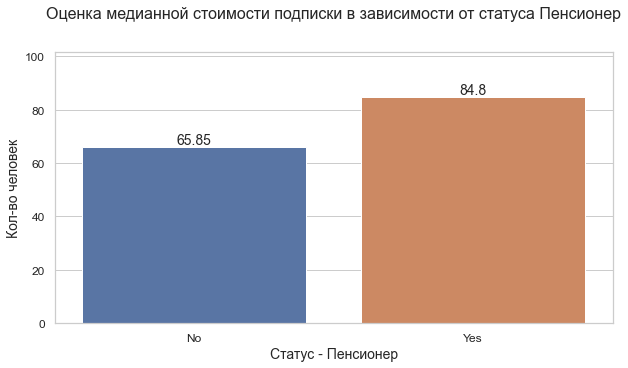

In [162]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_g_tmp, x='SeniorCitizen', y='50%', ax=ax)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_ylim(0, df_g_tmp['50%'].max()*1.2)
ax.set_title('Оценка медианной стоимости подписки в зависимости от статуса Пенсионер', fontsize=16, y=1.1)
ax.set_xlabel('Статус - Пенсионер', fontsize=14)
ax.set_ylabel('Кол-во человек', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

plt.show()

В среднем стоимость подписки среди пенсионеров значительно выше, чем у остальных пользователей, при том, что медианное значение количества подписок одинаковое.

Text(0, 0.5, 'Кол-во пользователей')

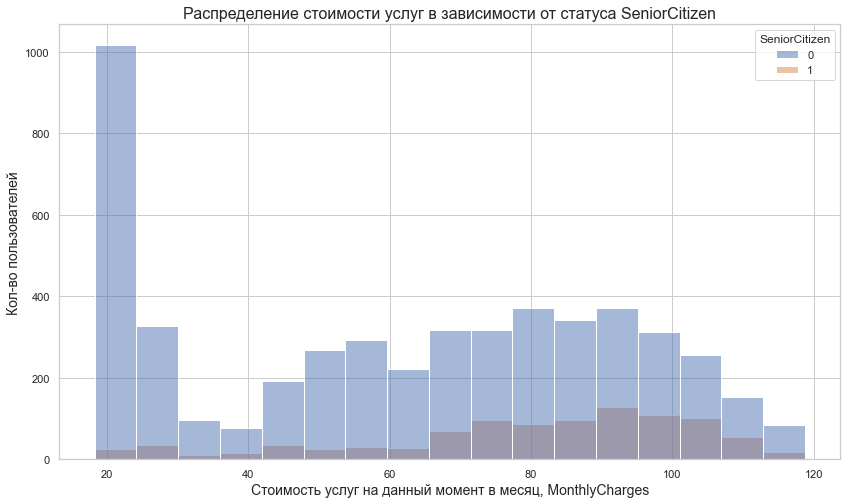

In [163]:
# Отобразим распределение стоимостей подписок среди пользователей

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='MonthlyCharges', hue='SeniorCitizen')
plt.title('Распределение стоимости услуг в зависимости от статуса SeniorCitizen', fontsize=16)
plt.xlabel('Стоимость услуг на данный момент в месяц, MonthlyCharges', fontsize=14)
plt.ylabel('Кол-во пользователей', fontsize=14)

Большинство пенсионеров оплачивали подписки, близкие к максимальной стоимости среди всех пользователей

### 2.10 Расчёт популярности подписок среди Пенсионеров и прочих пользователей

In [164]:
count_sc = df.groupby('SeniorCitizen')['customerID'].count()
count_sc

SeniorCitizen
0    5020
1     966
Name: customerID, dtype: int64

In [165]:
df_sc_tmp = df.groupby('SeniorCitizen')[['OnlineSecurity', 'OnlineBackup', 
                                         'DeviceProtection','TechSupport', 
                                         'StreamingTV', 'StreamingMovies']].apply(lambda x: (x=='Yes').sum()).reset_index()
df_sc_tmp.drop('SeniorCitizen', axis=1, inplace=True)
df_sc_tmp

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1474,1686,1659,1516,1824,1836
1,239,404,396,219,482,503


In [166]:
df_sc_tmp.apply(lambda x: round(x/count_sc[x.index], 2), axis=0)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0.29,0.34,0.33,0.30,0.36,0.37
1,0.25,0.42,0.41,0.23,0.50,0.52


Самыми популярными подписками среди пенсионеров являются StreamingMovies (52%) и StreamingTV (50%).
Среди прочих пользователей данные подписки также самые популярные, но с результатом 37% и 36% соответственно.


Также у пенсионеров странно популярны подписки OnlineBackup (42%) и DeviceProtection 41%. Возможно -навязанные услуги, что повышает общую стоимость услуг.

### 2.11 Расчёт средней стоимости за весь срок оплаты услуг, и оценка превышения существующей оплаты над средней

In [167]:
df1['MeanMonthlyCharges'] = df1.apply(lambda x: x['TotalCharges']/x['tenure'] if x['tenure'] > 0  else x['MonthlyCharges'],axis=1)
df1['MonthlyMoreMeanCharges'] = df1.apply(lambda x: 'No' if x['tenure'] == 0 else ('Yes' if x['MonthlyCharges'] > x['TotalCharges']/x['tenure'] else 'No'),axis=1)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MeanMonthlyCharges,MonthlyMoreMeanCharges
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,2,0,1,24.10,1734.65,0,24.092361,Yes
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,0,1,1,88.15,3973.20,0,90.300000,No
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,1,0,74.95,2869.85,1,75.522368,No
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,2,0,1,2,55.90,238.50,0,59.625000,No
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,0,0,0,0,2,53.45,119.50,0,59.750000,No


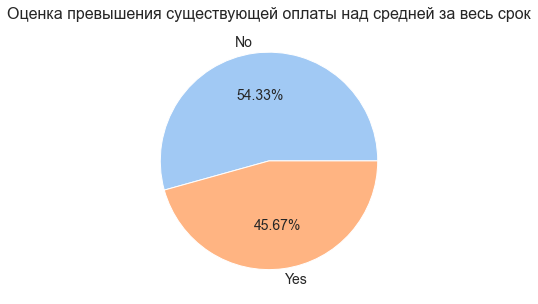

In [168]:
df_g_tmp = df1.groupby('MonthlyMoreMeanCharges')['customerID'].count().reset_index()
colors = sns.color_palette('pastel')[ 0:5 ]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_g_tmp['customerID'], labels = df_g_tmp['MonthlyMoreMeanCharges'], 
       colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})

ax.set_title('Оценка превышения существующей оплаты над средней за весь срок', fontsize=16)
plt.show()

In [169]:
# Оценка кол-ва пользователей, с превышением существующей оплаты над средней
df1.groupby(['SeniorCitizen', 'MonthlyMoreMeanCharges'])['customerID'].count()

SeniorCitizen  MonthlyMoreMeanCharges
0              No                        2730
               Yes                       2290
1              No                         522
               Yes                        444
Name: customerID, dtype: int64

Большая часть пользователей в данный момент оплачивают подписку по стоимости, не превыщающей среднюю за весь срок

### 2.12 Расчёт количества пользователей, которые пользуются услугами больше 1 месяца

In [170]:
# более 1го месяца
df1[df1['tenure'] > 1]['customerID'].count() / df1.shape[0]

0.9131306381556966

In [171]:
# более 2х месяцев
df1[df1['tenure'] > 2]['customerID'].count() / df1.shape[0]

0.880721683929168

In [172]:
# более 3х месяцев
df1[df1['tenure'] > 3]['customerID'].count() / df1.shape[0]

0.8524891413297695

Абсолютная бОльшая часть пользователей подписаны более одного, двух, и даже трёх месяцев, что отбрасывает подозрения на сверх ранний отток.

### 2.13 Отток пользователей в зависимости от статуса "Dependents" - наличие иждивенцев

In [173]:
df_de = df[['Dependents', 'Churn', 'customerID']].groupby(['Dependents', 'Churn']).count().reset_index()
de_count = df_de.groupby('Dependents')['customerID'].sum()
df_de['%OfDE'] = round(df_de.apply(lambda x: x['customerID']/de_count[x['Dependents']], axis=1), 2)
df_de

,Dependents,Churn,customerID,%OfDE
0,No,No,2889,0.69
1,No,Yes,1306,0.31
2,Yes,No,1510,0.84
3,Yes,Yes,281,0.16


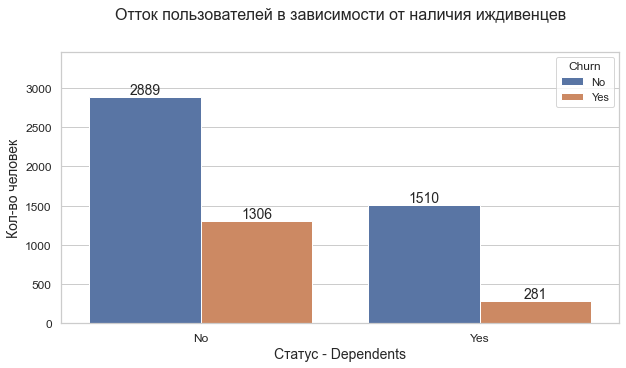

In [174]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_de, x='Dependents', y='customerID', hue='Churn', ax=ax)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_ylim(0, df_de['customerID'].max()*1.2)
ax.set_title('Отток пользователей в зависимости от наличия иждивенцев', fontsize=16, y=1.1)
ax.set_xlabel('Статус - Dependents', fontsize=14)
ax.set_ylabel('Кол-во человек', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

plt.show()

- Из числах тех, у кого не было иждивенцев, ушли целых 31% пользователей;
- Из числах тех, у кого были иждивенцы, ушли только 16% пользователей.

### 2.14 Отток пользователей в зависимости от статуса "Partner" - состояние в браке

In [175]:
df_pa = df[['Partner', 'Churn', 'customerID']].groupby(['Partner', 'Churn']).count().reset_index()
pa_count = df_pa.groupby('Partner')['customerID'].sum()
df_pa['%OfDE'] = round(df_pa.apply(lambda x: x['customerID']/pa_count[x['Partner']], axis=1), 2)
df_pa

,Partner,Churn,customerID,%OfDE
0,No,No,2071,0.67
1,No,Yes,1011,0.33
2,Yes,No,2328,0.80
3,Yes,Yes,576,0.20


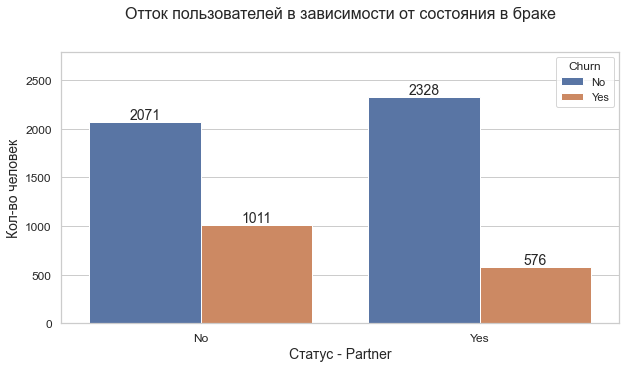

In [176]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_pa, x='Partner', y='customerID', hue='Churn', ax=ax)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_ylim(0, df_pa['customerID'].max()*1.2)
ax.set_title('Отток пользователей в зависимости от состояния в браке', fontsize=16, y=1.1)
ax.set_xlabel('Статус - Partner', fontsize=14)
ax.set_ylabel('Кол-во человек', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=14)

plt.show()

- Из числах тех, кто состоял в браке, ушли целых 33% пользователей;
- Из числах тех, кто не состоял в браке, ушли 20% пользователей.

## 2.15 Промежуточные итоги по оценке данных:

- Признак 'MultipleLines' сильно зависит от значения признака 'PhoneService' и даже нивелирует его;
- Признаки ['OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'] сильно зависят от значения признака 'InternetService';
- Стоимость подписки ушедших людей ощутимо выше;
- Большая часть пользователей в данный момент оплачивают подписку по стоимости, не превыщающей среднюю за весь срок;
- Абсолютная бОльшая часть пользователей подписаны более одного, двух, и даже трёх месяцев, что отбрасывает подозрения на сверх ранний отток.


- Из числа тех, кто является пенсионером, ушли целых 42% пользователей;
- Из числа тех, кто не является пенсионером, ушли 24% пользователей;
- В среднем стоимость подписки среди пенсионеров значительно выше, чем у остальных пользователей, при том, что медианное значение количества подписок одинаковое;
- Большинство пенсионеров оплачивали подписки, близкие к максимальной стоимости среди всех пользователей.


- Из числа тех, у кого нет интернета, ушли всего 8% пользователей;
- Из числа тех, у кого был интернет, ушли целых 32% пользователей;
- Очень большое кол-во пользователей ушло от провайдера Fiber optic: 69% от общего кол-ва ушедших. (25% от DSL, и всего 6% были те, у кого не было интернета).


- Из числа тех, кто был на конктракте "month-to-month", ушли целых 43% пользователей;
- Из числа тех, кто был на конктракте "One year", "Two year", ушли всего 12% и 3% пользователей (соотв.);
- Пользователи с контрактом "month-to-month" составляют порядка 88% от общего числа ушедших пользователей.


- Из числа тех, кто использовал метод оплаты "Electronic check", ушли целых 45% пользователей;
- По остальным типам оплаты в целом ситуация ровная (15-19%);
- Из всех ушедших пользователей целых 57% - те, кто использовал метод оплаты "Electronic check";
- По остальным значения намного меньше.


- Из числа тех, у кого был иждевенец, ушли 16% пользователей
- Из числа тех, у кого не было иждевенеца, ушло целых 31% пользователей


- Из числа тех, кто был в браке, ушли целых 33% пользователей
- Из числа тех, кто не был в браке, ушли 20 % пользователей

Значетельное влияние на отток оказывают (корреляция):
1. tenure: Кол-во месяцев присутствия в компании (обратно);
2. Подписки на Интернет Сервисы (обратно, и значительно больше, чем в целом наличие интернета);
3. Contract: Вид контракта (обратно);
4. PaperlessBilling: Использование безбумажного биллинга (прямо)
4. MonthlyCharges: Стоимость оплаты на данный момент(прямо);

# 3. Построение моделей для прогнозирования оттока

# !
В связи с перекосом классов по части кол-во объектов в каждом из них, и также с учётом нежелания пропустить ушедшего пользователя при классификации - будет использована метрика recall_score.

Также будет использован параметр "stratify" при разбиении выборки в train_test_split.

### 3.1 Исключение явно лишних признаков

In [177]:
data = df1.drop(['customerID', 'TotalCharges', 'MeanMonthlyCharges', 'MonthlyMoreMeanCharges'], axis=1)
#df1.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [178]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,1


### 3.2 Масштабирование данных

In [179]:
# Признаки 'tenure', 'MonthlyCharges' слишком отличаются по значениям от всех остальных признаков

data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.1,0


In [180]:
sts = StandardScaler()
data['tenure'] = sts.fit_transform(data['tenure'].values.reshape(-1,1))
data['MonthlyCharges'] = sts.transform(data['MonthlyCharges'].values.reshape(-1,1))
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,1.612576,1,2,2,1,1,1,1,1,1,2,0,1,-0.341382,0


### 3.3 Разбиение выборки признаков и предсказаний на обучающую и тестовую выборки

In [181]:
base_random_state = 13
base_test_size = 0.3

y_data = data['Churn'].values
X_data = data.drop('Churn', axis=1).values

In [182]:
'''
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_data, y_data, 
                                                                        test_size=base_test_size, 
                                                                        random_state=base_random_state,
                                                                        stratify=y_data)
# доп параметр stratify=y_data - в связи с большим дисбалансом классов
'''

'\nX_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_data, y_data, \n                                                                        test_size=base_test_size, \n                                                                        random_state=base_random_state,\n                                                                        stratify=y_data)\n# доп параметр stratify=y_data - в связи с большим дисбалансом классов\n'

In [183]:
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_data, y_data, 
                                                                        test_size=base_test_size, 
                                                                        random_state=base_random_state)

### 3.4 Поиск слабых признаков

In [184]:
rfc_find = RandomForestClassifier()
rfc_find.fit(X_train_main, y_train_main)
display(rfc_find.score(X_test_main, y_test_main))

0.7889755011135857

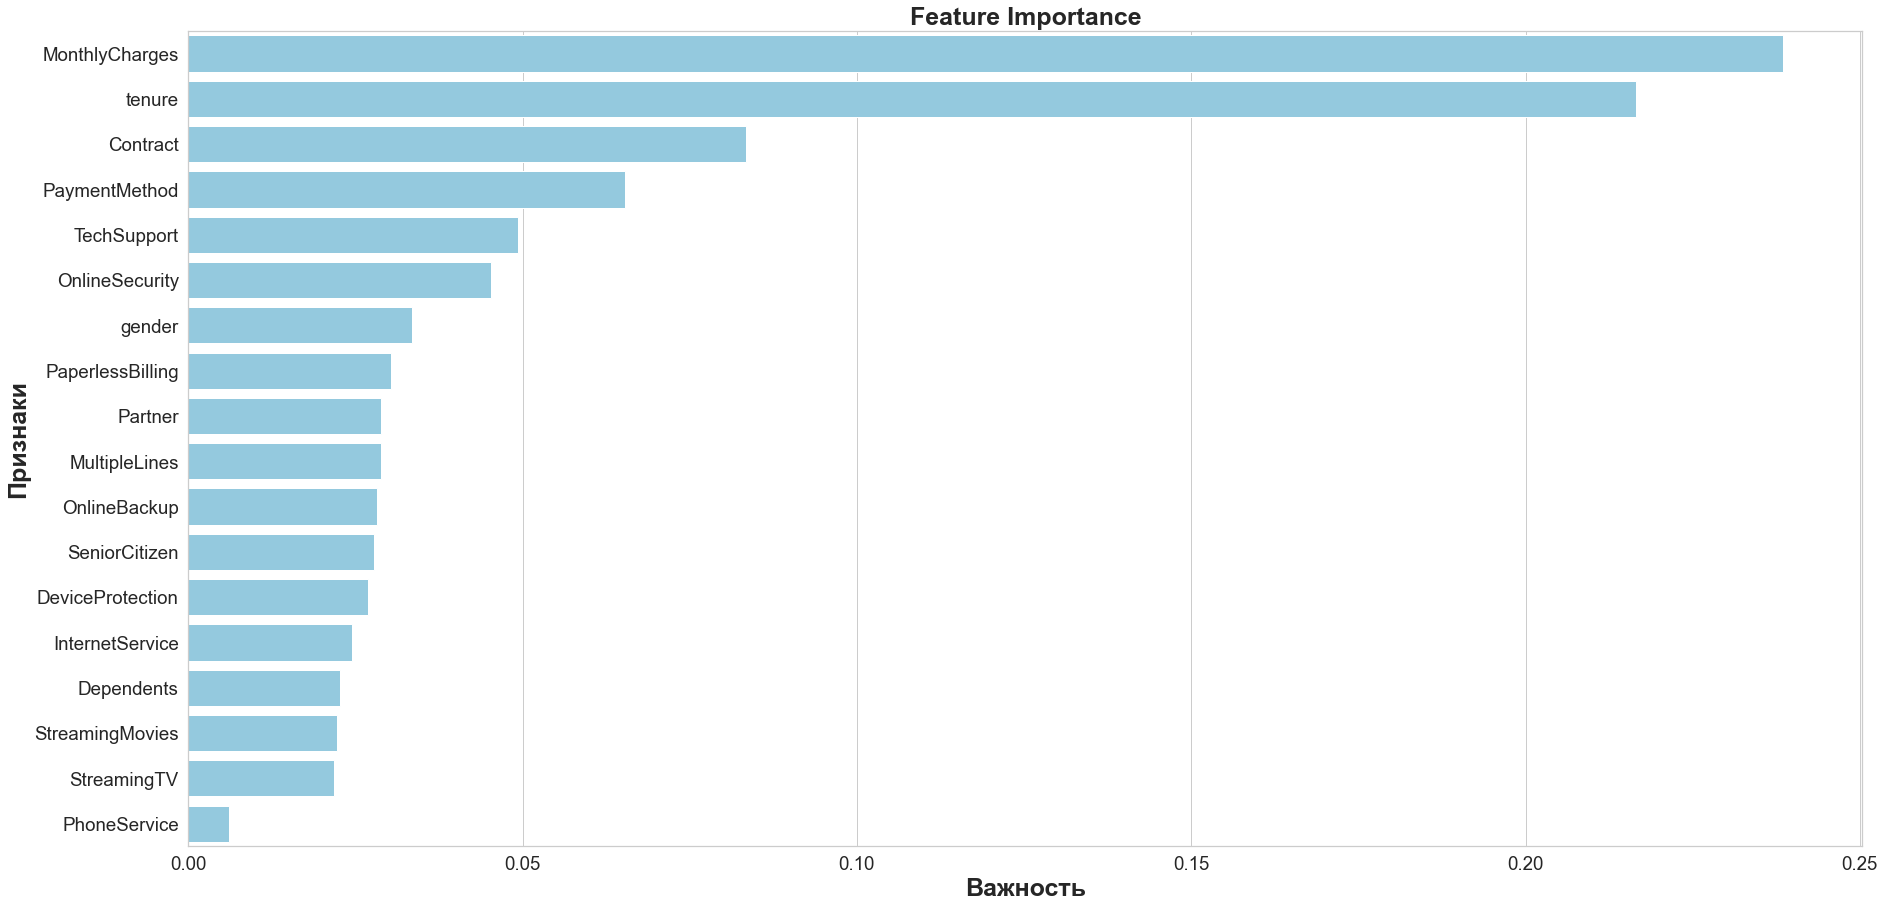

None

In [185]:
feats = {}
for feature, importance in zip(data.columns, rfc_find.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [186]:
display(importances)

,Features,Gini-Importance
0,MonthlyCharges,0.238449
1,tenure,0.216503
2,Contract,0.083457
3,PaymentMethod,0.065297
4,TechSupport,0.049367
5,OnlineSecurity,0.045240
6,gender,0.033426
7,PaperlessBilling,0.030384
8,Partner,0.028888
9,MultipleLines,0.028822


Наиболее "весомыми/важными" признаками можно назвать следующие: tenure, MonthlyCharges, Contract, PaymentMethod, и как вариант ещё OnlineSecurity. Остальные признаки выдали значительно меньший результат.

### 3.5 Оценка доли признаков от общей дисперсии

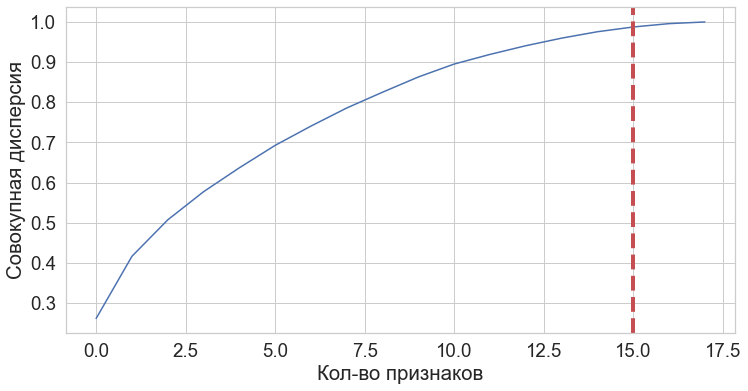

None

,Features,Cumulative Variance Ratio,Explained Variance Ratio
0,gender,0.261758,0.261758
1,SeniorCitizen,0.416553,0.154795
2,Partner,0.507313,0.090761
3,Dependents,0.577373,0.070060
4,tenure,0.636949,0.059575
5,PhoneService,0.692806,0.055857
6,MultipleLines,0.740787,0.047981
7,InternetService,0.785884,0.045097
8,OnlineSecurity,0.825185,0.039302
9,OnlineBackup,0.863101,0.037916


In [187]:
pca_test = PCA(n_components=18)
pca_test.fit(X_train_main)
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Кол-во признаков')
plt.ylabel('Совокупная дисперсия')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Features'] = data.drop('Churn', axis=1).columns
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(18))

#### Вывод по размерности: в связи с тем, что 92 процента покрываются уже при 10 из 18 признаков - в целом можно попробовать снизить размерность до 10

При проверке снижение размерности до 13 давало результат чуть хуже.

### 3.6 Снижение размерности входных данных

In [188]:
pca = PCA(n_components=10)
pca.fit(X_train_main)
X_train_main_pca = pca.transform(X_train_main)
X_test_main_pca = pca.transform(X_test_main)

### 3.7 Задание параметров для базовых алгоритмов и мета-алгоритма

In [189]:
# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

knn_params = {'n_neighbors': np.arange(1, 20, 1)} # KNeighborsClassifier

# параметры мета-алгоритма
lr_params = {'C': np.arange(0.5, 1, 0.1)} # LogisticRegression

# параметры валидации
base_cv = 5
skf_params = StratifiedKFold(n_splits=5, random_state=base_random_state, shuffle=True)
my_n_jobs = multiprocessing.cpu_count() - 2

In [190]:
# функция для вычисления ниболее подходящих параметров для моделей
def top_gs(model, params, X_train_gs, y_train_gs, cv_or_skf):
    tmp_gs_model = GridSearchCV(estimator=model, param_grid=params, cv=cv_or_skf, scoring='roc_auc')
    tmp_gs_model.fit(X_train_gs, y_train_gs)
    print('Best params for {name}: {params}\n'.format(name=model.__class__.__name__, 
                                                    params=tmp_gs_model.best_params_))    

### 3.8 Подготовка и обучение моделей

### 3.8.1 Без применения PCA

In [191]:
# инициализация базовых моделей
# выбраны в связи с поддержкой как двоичной, так и мультиклассовой классификации

gbc = GradientBoostingClassifier(random_state=base_random_state)
rfc = RandomForestClassifier(random_state=base_random_state)
svc = SVC(random_state=base_random_state, probability=True)
knn = KNeighborsClassifier(n_jobs=my_n_jobs)

# инициализация списка базовых моделей и списка их параметров
base_models = [gbc, rfc, svc, knn]
base_params_gs = [gbc_params, rfc_params, svc_params, knn_params]

# инициализация мета-алгоритма
lr = LogisticRegression(random_state=base_random_state)

#### Разбиение данных

In [192]:
# Пока без доп разбиения
X_train, X_test, y_train, y_test = X_train_main.copy(), X_test_main.copy(), y_train_main.copy(), y_test_main.copy()

#### Параметры базовых моделей

In [193]:
for id_model, model in enumerate(base_models):
    top_gs(model, base_params_gs[id_model], X_train, y_train, skf_params)

Best params for GradientBoostingClassifier: {'learning_rate': 0.1}

Best params for RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 70}

Best params for SVC: {'C': 0.30000000000000004, 'kernel': 'linear'}

Best params for KNeighborsClassifier: {'n_neighbors': 19}



In [194]:
gbc.set_params(learning_rate = 0.1)

GradientBoostingClassifier(random_state=13)

In [195]:
rfc.set_params(min_samples_leaf = 4, n_estimators = 70)

RandomForestClassifier(min_samples_leaf=4, n_estimators=70, random_state=13)

In [196]:
svc.set_params(C = 0.3, kernel = 'linear')

SVC(C=0.3, kernel='linear', probability=True, random_state=13)

In [197]:
knn.set_params(n_neighbors = 19)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

In [198]:
models_predict = np.empty((X_test.shape[0], len(base_models)))
for id_model, model in enumerate(base_models):
    model.fit(X_train, y_train)
    model_predict = model.predict(X_test)
    models_predict[:, id_model] = model_predict
    
    model_recall = recall_score(y_test, model_predict)
    print('Recall score (test) for {name}: {score}'.format(name=model.__class__.__name__,
                                                             score=model_recall))
    
    model_predict_proba = model.predict_proba(X_test)
    model_roc_auc = roc_auc_score(y_test, model_predict_proba[:, 1])
    print('Roc-Auc score (test) for {name}: {score}\n'.format(name=model.__class__.__name__,
                                                              score=model_roc_auc))

Recall score (test) for GradientBoostingClassifier: 0.5042016806722689
Roc-Auc score (test) for GradientBoostingClassifier: 0.8520912910618794

Recall score (test) for RandomForestClassifier: 0.46218487394957986
Roc-Auc score (test) for RandomForestClassifier: 0.849534472880061

Recall score (test) for SVC: 0.5336134453781513
Roc-Auc score (test) for SVC: 0.8517777565571683

Recall score (test) for KNeighborsClassifier: 0.4894957983193277
Roc-Auc score (test) for KNeighborsClassifier: 0.8176534250063662



#### Параметры мета-алгоритма

In [199]:
top_gs(lr, lr_params, models_predict, y_test, skf_params)

Best params for LogisticRegression: {'C': 0.5}



In [200]:
lr.set_params(C = 0.5)

LogisticRegression(C=0.5, random_state=13)

#### Вариант 1 - Стекинг

In [201]:
estimators = [('gbc', gbc),
              ('rfc', rfc),
              ('svc', svc),
              ('knn', knn)]

In [202]:
stack_cl = StackingClassifier(estimators, lr, cv=skf_params, n_jobs=my_n_jobs)

In [203]:
stack_cl.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
                   estimators=[('gbc',
                                GradientBoostingClassifier(random_state=13)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=4,
                                                       n_estimators=70,
                                                       random_state=13)),
                               ('svc',
                                SVC(C=0.3, kernel='linear', probability=True,
                                    random_state=13)),
                               ('knn',
                                KNeighborsClassifier(n_jobs=10,
                                                     n_neighbors=19))],
                   final_estimator=LogisticRegression(C=0.5, random_state=13),
                   n_jobs=10)

#### Вариант 2 - К-ближайших соседей

In [204]:
knn_2 = KNeighborsClassifier(n_jobs=my_n_jobs)

In [205]:
top_gs(knn_2, knn_params, X_train, y_train, skf_params)

Best params for KNeighborsClassifier: {'n_neighbors': 19}



In [206]:
knn_2.set_params(n_neighbors = 19)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

In [207]:
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

#### Вариант 3 - Логистическая регрессия

In [208]:
lr_2 = LogisticRegression(random_state=base_random_state)

In [209]:
top_gs(lr_2, lr_params, X_train, y_train, skf_params)

Best params for LogisticRegression: {'C': 0.8999999999999999}



In [210]:
lr_2.set_params(C = 0.9)

LogisticRegression(C=0.9, random_state=13)

In [211]:
lr_2.fit(X_train, y_train)

LogisticRegression(C=0.9, random_state=13)

### 3.8.2 С применением PCA

In [212]:
# инициализация базовых моделей
# выбраны в связи с поддержкой как двоичной, так и мультиклассовой классификации

gbc_pca = GradientBoostingClassifier(random_state=base_random_state)
rfc_pca = RandomForestClassifier(random_state=base_random_state)
svc_pca = SVC(random_state=base_random_state, probability=True)
knn_pca = KNeighborsClassifier(n_jobs=my_n_jobs)

# инициализация списка базовых моделей и списка их параметров
base_models_pca = [gbc_pca, rfc_pca, svc_pca, knn_pca]
base_params_gs = [gbc_params, rfc_params, svc_params, knn_params]

# инициализация мета-алгоритма
lr_pca = LogisticRegression(random_state=base_random_state)

#### Разбиение данных

In [213]:
# Пока без доп разбиения
X_train, X_test, y_train, y_test = X_train_main_pca.copy(), X_test_main_pca.copy(), y_train_main.copy(), y_test_main.copy()

#### Параметры базовых моделей

In [214]:
for id_model, model in enumerate(base_models_pca):
    top_gs(model, base_params_gs[id_model], X_train, y_train, skf_params)

Best params for GradientBoostingClassifier: {'learning_rate': 0.1}

Best params for RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 90}

Best params for SVC: {'C': 0.30000000000000004, 'kernel': 'linear'}

Best params for KNeighborsClassifier: {'n_neighbors': 19}



In [215]:
gbc_pca.set_params(learning_rate = 0.1)

GradientBoostingClassifier(random_state=13)

In [216]:
rfc_pca.set_params(min_samples_leaf = 4, n_estimators = 90)

RandomForestClassifier(min_samples_leaf=4, n_estimators=90, random_state=13)

In [217]:
svc_pca.set_params(C = 0.3, kernel = 'linear')

SVC(C=0.3, kernel='linear', probability=True, random_state=13)

In [218]:
knn_pca.set_params(n_neighbors = 19)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

In [219]:
models_pca_predict = np.empty((X_test.shape[0], len(base_models_pca)))
for id_model, model in enumerate(base_models_pca):
    model.fit(X_train, y_train)
    model_predict = model.predict(X_test)
    models_pca_predict[:, id_model] = model_predict
    
    model_recall = recall_score(y_test, model_predict)
    print('Recall score (test) for {name}: {score}'.format(name=model.__class__.__name__,
                                                             score=model_recall))
    
    model_predict_proba = model.predict_proba(X_test)
    model_roc_auc = roc_auc_score(y_test, model_predict_proba[:, 1])
    print('Roc-Auc score (test) for {name}: {score}\n'.format(name=model.__class__.__name__,
                                                              score=model_roc_auc))

Recall score (test) for GradientBoostingClassifier: 0.4831932773109244
Roc-Auc score (test) for GradientBoostingClassifier: 0.8368625859434684

Recall score (test) for RandomForestClassifier: 0.43487394957983194
Roc-Auc score (test) for RandomForestClassifier: 0.8163610898905017

Recall score (test) for SVC: 0.5210084033613446
Roc-Auc score (test) for SVC: 0.849128628724217

Recall score (test) for KNeighborsClassifier: 0.42016806722689076
Roc-Auc score (test) for KNeighborsClassifier: 0.8163976954418131



#### Параметры мета-алгоритма

In [220]:
top_gs(lr_pca, lr_params, models_pca_predict, y_test, skf_params)

Best params for LogisticRegression: {'C': 0.6}



In [221]:
lr_pca.set_params(C = 0.6)

LogisticRegression(C=0.6, random_state=13)

#### Вариант 4 - Стекинг + PCA

In [222]:
estimators_pca = [('gbc_pca', gbc_pca),
                  ('rfc_pca', rfc_pca),
                  ('svc_pca', svc_pca),
                  ('knn_pca', knn_pca)]

In [223]:
stack_cl_pca = StackingClassifier(estimators_pca, lr_pca, cv=skf_params, n_jobs=my_n_jobs)

In [224]:
stack_cl_pca.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
                   estimators=[('gbc_pca',
                                GradientBoostingClassifier(random_state=13)),
                               ('rfc_pca',
                                RandomForestClassifier(min_samples_leaf=4,
                                                       n_estimators=90,
                                                       random_state=13)),
                               ('svc_pca',
                                SVC(C=0.3, kernel='linear', probability=True,
                                    random_state=13)),
                               ('knn_pca',
                                KNeighborsClassifier(n_jobs=10,
                                                     n_neighbors=19))],
                   final_estimator=LogisticRegression(C=0.6, random_state=13),
                   n_jobs=10)

#### Вариант 5 - К-ближайших соседей + PCA

In [225]:
knn_2_pca = KNeighborsClassifier(n_jobs=my_n_jobs)

In [226]:
top_gs(knn_2_pca, knn_params, X_train, y_train, skf_params)

Best params for KNeighborsClassifier: {'n_neighbors': 19}



In [227]:
knn_2_pca.set_params(n_neighbors = 19)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

In [228]:
knn_2_pca.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=19)

#### Вариант 6 - Логистическая регрессия + PCA

In [229]:
lr_2_pca = LogisticRegression(random_state=base_random_state)

In [230]:
top_gs(lr_2_pca, lr_params, X_train, y_train, skf_params)

Best params for LogisticRegression: {'C': 0.8999999999999999}



In [231]:
lr_2_pca.set_params(C = 0.9)

LogisticRegression(C=0.9, random_state=13)

In [232]:
lr_2_pca.fit(X_train, y_train)

LogisticRegression(C=0.9, random_state=13)

# 4. Сравнение качества моделей 

### 4.1 Без применения PCA

#### Вариант 1 - Стекинг

In [233]:
# Получение прогнозов по отложенной выборке 
stack_test_predict = stack_cl.predict(X_test_main)
stack_test_predict_proba = stack_cl.predict_proba(X_test_main)

In [234]:
stack_recall = recall_score(y_test_main, stack_test_predict)
print('Recall score для мета-алгоритма: {score}'.format(score=stack_recall))

Recall score для мета-алгоритма: 0.4957983193277311


In [235]:
stack_roc_auc = roc_auc_score(y_test_main, stack_test_predict_proba[:, 1])
print('Roc_Auc score для мета-алгоритма: {score}'.format(score=stack_roc_auc))

Roc_Auc score для мета-алгоритма: 0.8555131143366437


#### Вариант 2 - К-ближайших соседей

In [236]:
# Получение прогнозов по отложенной выборке 
knn_2_test_predict = knn_2.predict(X_test_main)
knn_2_test_predict_proba = knn_2.predict_proba(X_test_main)

In [237]:
knn_2_recall = recall_score(y_test_main, knn_2_test_predict)
print('Recall score для knn_2: {score} '.format(score=knn_2_recall))

Recall score для knn_2: 0.4894957983193277 


In [238]:
knn_2_roc_auc = roc_auc_score(y_test_main, knn_2_test_predict_proba[:, 1])
print('Roc_Auc score для knn_2: {score}'.format(score=knn_2_roc_auc))

Roc_Auc score для knn_2: 0.8176534250063662


#### Вариант 3 - Логистическая регрессия

In [239]:
# Получение прогнозов по отложенной выборке 
lr_2_test_predict = lr_2.predict(X_test_main)
lr_2_test_predict_proba = lr_2.predict_proba(X_test_main)

In [240]:
lr_2_recall = recall_score(y_test_main, lr_2_test_predict)
print('Recall score для lr_2: {score} '.format(score=lr_2_recall))

Recall score для lr_2: 0.5315126050420168 


In [241]:
lr_2_roc_auc = roc_auc_score(y_test_main, lr_2_test_predict_proba[:, 1])
print('Roc_Auc score для lr_2: {score}'.format(score=lr_2_roc_auc))

Roc_Auc score для lr_2: 0.8526451489686785


### 4.2 С применением PCA

#### Вариант 4 - Стекинг + PCA

In [242]:
# Получение прогнозов по отложенной выборке 
stack_pca_test_predict = stack_cl_pca.predict(X_test_main_pca)
stack_pca_test_predict_proba = stack_cl_pca.predict_proba(X_test_main_pca)

In [243]:
stack_pca_recall = recall_score(y_test_main, stack_pca_test_predict)
print('Recall score для мета-алгоритма + PCA: {score}'.format(score=stack_pca_recall))

Recall score для мета-алгоритма + PCA: 0.4642857142857143


In [244]:
stack_pca_roc_auc = roc_auc_score(y_test_main, stack_pca_test_predict_proba[:, 1])
print('Roc_Auc score для мета-алгоритма + PCA: {score}'.format(score=stack_pca_roc_auc))

Roc_Auc score для мета-алгоритма + PCA: 0.8439266615737203


#### Вариант 5 - К-ближайших соседей + PCA

In [245]:
# Получение прогнозов по отложенной выборке 
knn_2_pca_test_predict = knn_2_pca.predict(X_test_main_pca)
knn_2_pca_test_predict_proba = knn_2_pca.predict_proba(X_test_main_pca)

In [246]:
knn_2_pca_recall = recall_score(y_test_main, knn_2_pca_test_predict)
print('Recall score для knn_2 + PCA: {score} '.format(score=knn_2_pca_recall))

Recall score для knn_2 + PCA: 0.42016806722689076 


In [247]:
knn_2_pca_roc_auc = roc_auc_score(y_test_main, knn_2_pca_test_predict_proba[:, 1])
print('Roc_Auc score для knn_2 + PCA: {score}'.format(score=knn_2_pca_roc_auc))

Roc_Auc score для knn_2 + PCA: 0.8163976954418131


#### Вариант 6 - Логистическая регрессия + PCA

In [248]:
# Получение прогнозов по отложенной выборке 
lr_2_pca_test_predict = lr_2_pca.predict(X_test_main_pca)
lr_2_pca_test_predict_proba = lr_2_pca.predict_proba(X_test_main_pca)

In [249]:
lr_2_pca_recall = recall_score(y_test_main, lr_2_pca_test_predict)
print('Recall score для lr_2 + PCA: {score} '.format(score=lr_2_pca_recall))

Recall score для lr_2 + PCA: 0.5189075630252101 


In [250]:
lr_2_pca_roc_auc = roc_auc_score(y_test_main, lr_2_pca_test_predict_proba[:, 1])
print('Roc_Auc score для lr_2 + PCA: {score}'.format(score=lr_2_pca_roc_auc))

Roc_Auc score для lr_2 + PCA: 0.8495018461930227


In [125]:
#---------------------------------------------------------------------------------------------------------------------#

### В очередной раз, почему-то, стекинг проигрывает по итоговой метрике качества.

# Результаты и выводы

#### Лучший результат Roc_Auc был показан алгоритмом StackingClassifier без использования PCA (вариант 1), и составил: 0.856 (roc_auc), 0.496 (recall).

#### Но если учитывать также и recall показатель, то лучший результат показал алгоритм LogisticRegression(C = 0.9, random_state=13)  без использования PCA (вариант 3), и составил: 0.853 (roc_auc), 0.532 (recall).

- Наиболее "весомыми/важными" признаками можно назвать следующие: tenure, MonthlyCharges, Contract, PaymentMethod, и как вариант ещё OnlineSecurity. Остальные признаки выдали значительно меньший результат.


- Вывод по снижению размерности: в связи с тем, что 92 процента дисперсии покрываются уже при 10 из 18 признаков - размерность была снижена до 10.


#### Необходимо обратить внимание на стоимость подписок:
- Стоимость подписки ушедших людей ощутимо выше;
- Большая часть пользователей в данный момент оплачивают подписку по стоимости, не превыщающей среднюю за весь срок;
- Абсолютная бОльшая часть пользователей подписаны более одного, двух, и даже трёх месяцев, что отбрасывает подозрения на сверх ранний отток;
- Желательно собирать данные о последних повышениях стоимости подписки.


#### Пользователей в статусе Пенсионер в процентном соотношении ушло гораздо больше:
- Из числа тех, кто является пенсионером, ушли целых 42% пользователей;
- Из числа тех, кто не является пенсионером, ушли 24% пользователей;
- В среднем стоимость подписки среди пенсионеров значительно выше, чем у остальных пользователей, при том, что медианное значение количества подписок одинаковое;
- Самыми популярными подписками среди пенсионеров являются StreamingMovies (52%) и StreamingTV (50%).
- Среди прочих пользователей данные подписки также самые популярные, но с результатом 37% и 36% соответственно.
- Также у пенсионеров странно популярны подписки OnlineBackup (42%) и DeviceProtection 41%. Возможно -навязанные услуги, что повышает общую стоимость услуг.
- Как следствие - большинство пенсионеров оплачивали в целом за услугу суммы, близкие к максимальным среди всех пользователей.


#### Пользователей с интернетом ушло гораздо больше, чем без него. Причём большинство из них ушли от Fiber optic:
- Из числа тех, у кого нет интернета, ушли всего 8% пользователей;
- Из числа тех, у кого был интернет, ушли целых 32% пользователей;
- Очень большое кол-во пользователей ушло от провайдера Fiber optic: 69% от общего кол-ва ушедших. (25% от DSL, и всего 6% были те, у кого не было интернета).
- Стоит присмотреться к данной фирме.


#### Пользователей с контрактом month-to-month ушло гораздо больше прочих:
- Из числа тех, кто был на конктракте "month-to-month", ушли целых 43% пользователей;
- Из числа тех, кто был на конктракте "One year", "Two year", ушли всего 12% и 3% пользователей (соотв.);
- Пользователи с контрактом "month-to-month" составляют порядка 88% от общего числа ушедших пользователей.
- Рекомендуется рассмотреть способы перевода людей с "month-to-month" на другие виды контракта.


#### Пользователей с оплатой через "Electronic check" ушло гораздо больше прочих:
- Из числа тех, кто использовал метод оплаты "Electronic check", ушли целых 45% пользователей;
- По остальным типам оплаты в целом ситуация ровная (15-19%);
- Из всех ушедших пользователей целых 57% - те, кто использовал метод оплаты "Electronic check";
- По остальным значения намного меньше.
- Стоит рассмотреть способы перевода людей на другой способ оплаты.


#### Пользователей без иждивенцев ушло почти в 2 раза больше:
- Из числа тех, у кого был иждевенец, ушли 16% пользователей
- Из числа тех, у кого не было иждевенеца, ушло целых 31% пользователей
- С этим вряд-ли что-то можно сделать.


#### Пользователей в браке ушло больше:
- Из числа тех, кто был в браке, ушли целых 33% пользователей
- Из числа тех, кто не был в браке, ушли 20 % пользователей
- С этим вряд-ли что-то можно сделать.